In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import transform
from skimage import morphology
from skimage.util import random_noise
%run -i ../scripts/fyp2021p3_group08_functions.py
import seaborn as sns

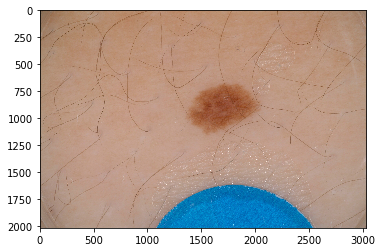

In [2]:
im = plt.imread('../data/example_image/ISIC_0001769.jpg')
plt.imshow(im)

In [3]:
#A color image is a array with 3 dimensions (x, y, R-G-B color channels) of integers

print(im.shape)
print(im.dtype)

#Other packages might wrap the image in a different class - you are allowed to use those if you want

(2016, 3024, 3)
uint8


[  0 121 196]


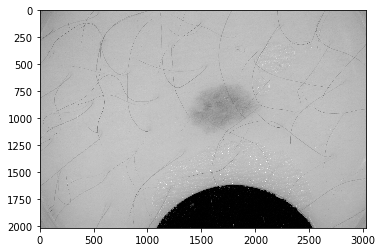

In [4]:
# Get a single RGB value from the blue circle (marker used by dermatologist)
print(im[2000,2000,:])

# Show only the red channel
plt.imshow(im[:,:,0], cmap='gray')



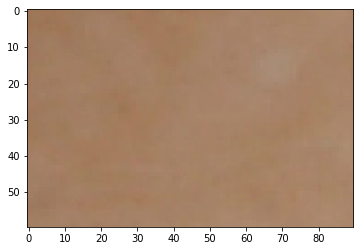

In [5]:
# Display only a part of the image

im_part = im[60:120,130:220,:]
plt.imshow(im_part)



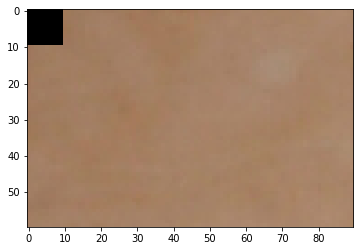

In [6]:
# Modify the image by setting some pixels to black

im_copy = im_part.copy()


im_copy[0:10,0:10,:] = np.tile(0, [10, 10, 3])
plt.imshow(im_copy)


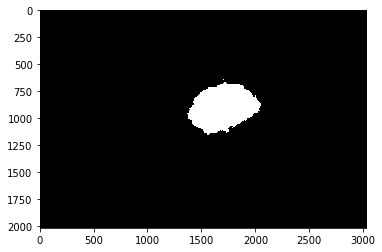

In [7]:
# Load the mask and display it

mask=plt.imread('../data/example_segmentation/ISIC_0001769_segmentation.png')
plt.imshow(mask, cmap='gray')


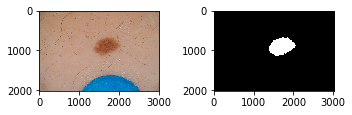

In [8]:
# Show image and mask side by side

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(im)
axes[1].imshow(mask, cmap='gray')
fig.tight_layout()

(3024, 2016)


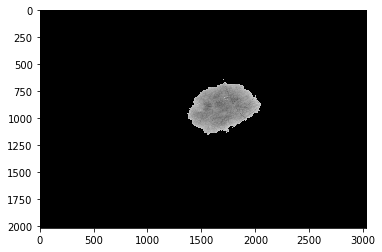

In [9]:
# Show the images overlayed, for this we can use PIL 

#!pip install pillow 
from PIL import Image 

# Load images as Image objects  
img1 = Image.open('../data/example_image/ISIC_0001769.jpg') 
img2 = Image.open('../data/example_segmentation/ISIC_0001769_segmentation.png') 
  
# Overlay - more options such as transparency should be available here  
img2.paste(img1, (0,0), mask = img2) 
  
# Display 
img2.show()  # This doesn't actually display an image in Google Colab :(
plt.imshow(img2, cmap='gray')


# Note that this is a single channel image
print(img2.size)   

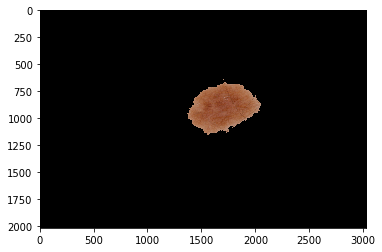

In [10]:
# Alternative: replace the non-lesion pixels

img1 = im.copy()
img1[mask==0] = 0
  
# Display 
plt.imshow(img1)

# You can use any package you prefer, but beware you might need to convert between formats

Inspect the dimensions and values inside the images, what do you notice?

In [11]:
img1

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [12]:
np.shape(img1)

(2016, 3024, 3)

How can you use the mask to measure the width or height of the skin lesion
at different points in the image? Can you now find the maximum width and
height? What about finding the maximum possible diameter of the lesion?

In [13]:
img1 = Image.open('../data/example_image/ISIC_0001852.jpg')
seg1 = Image.open('../data/example_segmentation/ISIC_0001852_segmentation.png')

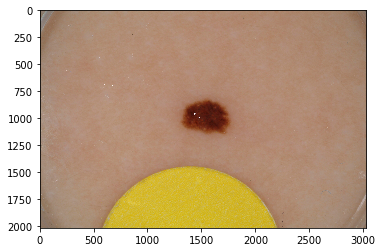

In [14]:
plt.imshow(img1)

Use the segmentation to mask out / erase the outside of the skin lesion. Can
you do this without a for loop?

In [15]:
seg1 = plt.imread('../data/example_segmentation/ISIC_0001852_segmentation.png')

In [16]:
def seg_img(picture, segment):
    height = segment.shape[0]
    width = segment.shape[1]
    
    #print(width, height)
    
    img_df = pd.DataFrame(segment)    
    
    lsw = []
    lsh = []
    
    for i in range(width):
        if list(img_df[i]).count(1.0) > 0:
            lsw.append(i)
        else:
            continue
    
    for i in range(height):
        if list(img_df.loc[i]).count(1.0) > 0:
            lsh.append(i)
        else:
            continue    

    #print(lsw[0], lsw[-1])
    #print(lsh[0], lsh[-1]) 
    
    img_part = picture[lsh[0]:lsh[-1],lsw[0]:lsw[-1]]
    segment_part = segment[lsh[0]:lsh[-1],lsw[0]:lsw[-1]]
    return (img_part, segment_part)

(520, 687, 3)

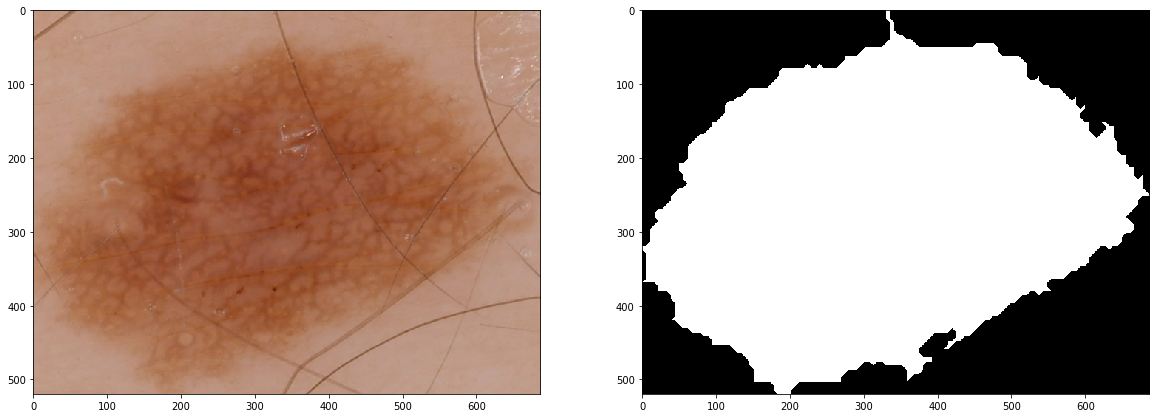

In [17]:
img3 = plt.imread(f'../data/example_image/ISIC_0001769.jpg')
seg3 = plt.imread(f'../data/example_segmentation/ISIC_0001769_segmentation.png')
crop_img, crop_seg = seg_img(img3, seg3)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 15))
axes[0].imshow(crop_img)
axes[1].imshow(crop_seg, cmap='gray')

np.shape(crop_img)

In [18]:
def length(cropped_img, xy1, xy2):
    img_np = np.array(cropped_img)
    
    if img_np[xy1] == 1.0 and img_np[xy2] == 1.0:
        length = xy2[1] - xy1[1]
        width = xy2[0] - xy1[0]
        return np.sqrt(length**2+width**2)
    else:
        return "Insert valid coordinates on the leisure"
    print(img_np[xy1])
    
length(crop_seg, (300,100), (400,200))

141.4213562373095

In [19]:
def compactness(segment):
    A, l = measure_area_perimeter(segment)
    C = l**2/(4*3.14159*A)
    return C

In [20]:
ls = [1,2,4,10,20,50,100,150,200,500,1000]

for i in ls:
    struct_el = morphology.disk(i)
    print(compactness(struct_el))


0.2546481240391012
0.3917663446755404
0.6496125613242378
0.787240257281764
0.7941293923892416
0.7952682012693411
0.8057197304041397
0.8096168197120418
0.8059698563263851
0.8103760885467526
0.8103366215381057


In [21]:
table = pd.read_csv("../data/example_ground_truth.csv")

In [22]:
image_list = list(table["image_id"])
for i in image_list:
    print(i)

ISIC_0001769
ISIC_0001852
ISIC_0001871
ISIC_0003462
ISIC_0003539
ISIC_0003582
ISIC_0003657
ISIC_0003805
ISIC_0004337
ISIC_0006651
ISIC_0006671
ISIC_0006815
ISIC_0006914
ISIC_0007141
ISIC_0007156
ISIC_0007235
ISIC_0007241
ISIC_0007332
ISIC_0007344
ISIC_0007528
ISIC_0007796
ISIC_0008025
ISIC_0008524
ISIC_0009995
ISIC_0010459
ISIC_0012099
ISIC_0012109
ISIC_0012126
ISIC_0012127
ISIC_0012143
ISIC_0012151
ISIC_0012159
ISIC_0012160
ISIC_0012191
ISIC_0012201
ISIC_0012204
ISIC_0012206
ISIC_0012210
ISIC_0012221
ISIC_0012222
ISIC_0012254
ISIC_0012256
ISIC_0012288
ISIC_0012306
ISIC_0012313
ISIC_0012316
ISIC_0012335
ISIC_0012380
ISIC_0012383
ISIC_0012400
ISIC_0012417
ISIC_0012434
ISIC_0012492
ISIC_0012513
ISIC_0012538
ISIC_0012547
ISIC_0012660
ISIC_0012684
ISIC_0012720
ISIC_0012746
ISIC_0012876
ISIC_0012927
ISIC_0012956
ISIC_0012959
ISIC_0012965
ISIC_0013010
ISIC_0013082
ISIC_0013104
ISIC_0013127
ISIC_0013128
ISIC_0013132
ISIC_0013188
ISIC_0013215
ISIC_0013232
ISIC_0013421
ISIC_0013491
ISIC_0013501

In [23]:
areas = []
perimeters = []
seg_path = "../data/example_segmentation/"
seg_line = "_segmentation.png"

img_path = "../data/example_image/"
img_line = ".jpg"

data_table = []

for images in image_list:
    img = plt.imread(img_path+images+img_line)
    seg = plt.imread(seg_path+images+seg_line)
    area_seg, perimeter_seg = measure_area_perimeter(seg)
    data_table += [[images, area_seg, perimeter_seg]]
    
    areas.append(area_seg)
    perimeters.append(perimeter_seg)

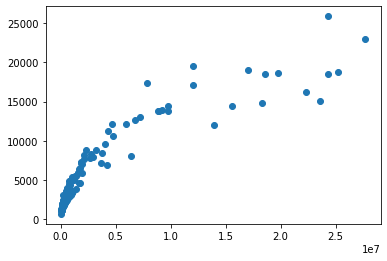

In [24]:
plt.scatter(areas,perimeters)

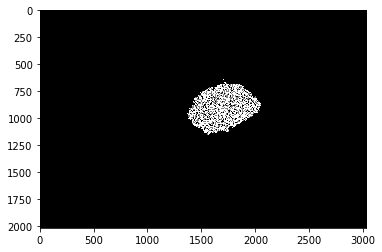

In [25]:
mask = seg3
noise = random_noise(mask, mode="poisson")

plt.imshow(noise, cmap="gray")

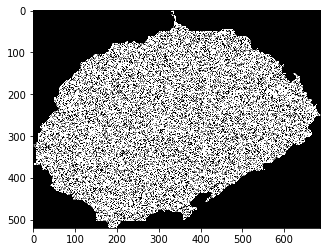

In [26]:
noise_crop, mask_crop = seg_img(noise, mask)
plt.imshow(noise_crop, cmap = "gray")

([array([515.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   3.]),
  array([513.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   5.]),
  array([511.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   7.]),
  array([509.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   6.]),
  array([507.,   0.,   0.,   0.,   0.,   4.,   0.,   0.,   0.,   9.]),
  array([507.,   0.,   0.,   0.,   0.,   6.,   0.,   0.,   0.,   7.]),
  array([475.,   0.,   0.,   0.,   0.,  17.,   0.,   0.,   0.,  28.]),
  array([478.,   0.,   0.,   0.,   0.,  11.,   0.,   0.,   0.,  31.]),
  array([478.,   0.,   0.,   0.,   0.,  11.,   0.,   0.,   0.,  31.]),
  array([471.,   0.,   0.,   0.,   0.,  14.,   0.,   0.,   0.,  35.]),
  array([471.,   0.,   0.,   0.,   0.,  17.,   0.,   0.,   0.,  32.]),
  array([461.,   0.,   0.,   0.,   0.,  17.,   0.,   0.,   0.,  42.]),
  array([454.,   0.,   0.,   0.,   0.,  25.,   0.,   0.,   0.,  41.]),
  array([455.,   0.,   0.,   0.,   0.,  12.,   0.,   0.,   0.,  53.]),
  arra

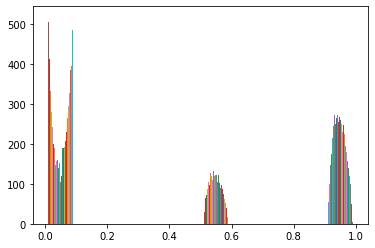

In [27]:
plt.hist(noise_crop)

In [28]:
A_noise, P_noise = measure_area_perimeter(noise)
A_mask, P_mask = measure_area_perimeter(mask)

print(A_noise - A_mask)
print(P_noise - P_mask)

-58294.5
52080.5


In [29]:
DF_Segments = pd.DataFrame(data_table)
DF_Segments.rename(columns = {1: "area", 2: "perimeter"}, inplace=True)

In [30]:
DF_Segments

0        area  perimeter
0    ISIC_0001769    216160.0     2013.0
1    ISIC_0001852    130493.0     1372.0
2    ISIC_0001871    205116.0     1720.0
3    ISIC_0003462    161705.0     1344.0
4    ISIC_0003539    317040.0     2063.0
..            ...         ...        ...
145  ISIC_0015443   9732988.0    13775.0
146  ISIC_0015445  12049938.0    19517.0
147  ISIC_0015483   8856478.0    13813.0
148  ISIC_0015496   8951522.0    13742.0
149  ISIC_0015627   3193093.0     8751.0

[150 rows x 3 columns]

In [31]:
extended_frame = pd.merge(table, DF_Segments, how="left", left_on = "image_id", right_on = 0).drop([0], axis=1)

In [32]:
extended_frame["diagnosis"] =  extended_frame["melanoma"] + extended_frame["seborrheic_keratosis"]
extended_frame["diagnosis"] = extended_frame["diagnosis"].map({0:"not cancerous", 1:"cancerous"})
extended_frame

image_id  melanoma  seborrheic_keratosis        area  perimeter  \
0    ISIC_0001769       0.0                   0.0    216160.0     2013.0   
1    ISIC_0001852       0.0                   0.0    130493.0     1372.0   
2    ISIC_0001871       0.0                   0.0    205116.0     1720.0   
3    ISIC_0003462       0.0                   0.0    161705.0     1344.0   
4    ISIC_0003539       0.0                   0.0    317040.0     2063.0   
..            ...       ...                   ...         ...        ...   
145  ISIC_0015443       0.0                   0.0   9732988.0    13775.0   
146  ISIC_0015445       0.0                   0.0  12049938.0    19517.0   
147  ISIC_0015483       0.0                   0.0   8856478.0    13813.0   
148  ISIC_0015496       0.0                   0.0   8951522.0    13742.0   
149  ISIC_0015627       0.0                   0.0   3193093.0     8751.0   

         diagnosis  
0    not cancerous  
1    not cancerous  
2    not cancerous  
3    not cancerous  
4    not cancerous  
..             ...  
145  not cancerous  
146  not cancerous  
147  not cancerous  
148  not cancerous  
149  not cancerous  

[150 rows x 6 columns]

Text(0.5, 1.0, 'Area vs perimter of skin lesions')

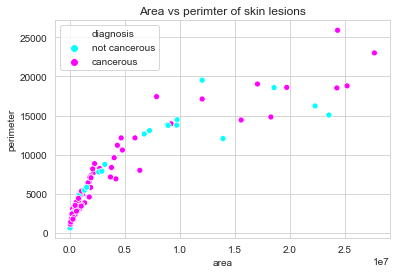

In [33]:
sns.set_style("whitegrid")
scatter = sns.scatterplot(data=extended_frame, x="area", y="perimeter", hue="diagnosis", palette=["cyan","magenta"])
scatter.set_title("Area vs perimter of skin lesions")

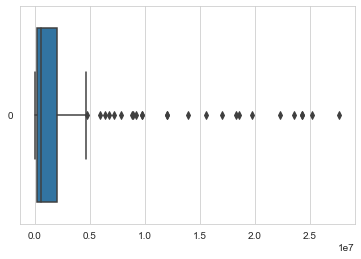

In [34]:
sns.boxplot(data = extended_frame["area"], orient = "h")

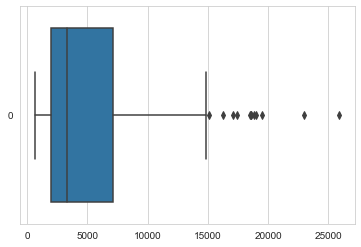

In [35]:
sns.boxplot(data = extended_frame["perimeter"], orient = "h")

In [36]:
extended_frame["compactness"] = (extended_frame["perimeter"]**2)/(4*np.pi*extended_frame["area"])

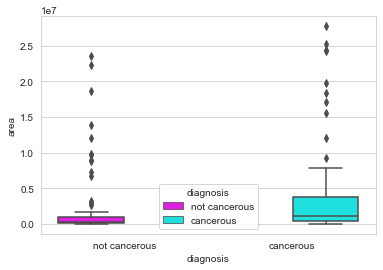

In [37]:
sns.boxplot(x = "diagnosis", y = "area", data = extended_frame, hue = "diagnosis", palette = ["magenta","cyan"])

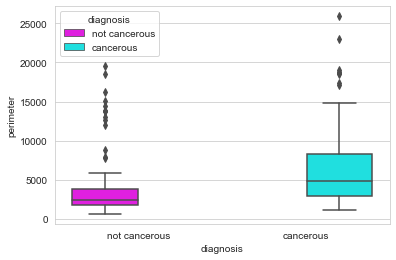

In [38]:
sns.boxplot(x = "diagnosis", y = "perimeter", data = extended_frame, hue = "diagnosis", palette = ["magenta","cyan"])

In [39]:
extended_frame

image_id  melanoma  seborrheic_keratosis        area  perimeter  \
0    ISIC_0001769       0.0                   0.0    216160.0     2013.0   
1    ISIC_0001852       0.0                   0.0    130493.0     1372.0   
2    ISIC_0001871       0.0                   0.0    205116.0     1720.0   
3    ISIC_0003462       0.0                   0.0    161705.0     1344.0   
4    ISIC_0003539       0.0                   0.0    317040.0     2063.0   
..            ...       ...                   ...         ...        ...   
145  ISIC_0015443       0.0                   0.0   9732988.0    13775.0   
146  ISIC_0015445       0.0                   0.0  12049938.0    19517.0   
147  ISIC_0015483       0.0                   0.0   8856478.0    13813.0   
148  ISIC_0015496       0.0                   0.0   8951522.0    13742.0   
149  ISIC_0015627       0.0                   0.0   3193093.0     8751.0   

         diagnosis  compactness  
0    not cancerous     1.491772  
1    not cancerous     1.147919  
2    not cancerous     1.147751  
3    not cancerous     0.888925  
4    not cancerous     1.068254  
..             ...          ...  
145  not cancerous     1.551412  
146  not cancerous     2.515541  
147  not cancerous     1.714372  
148  not cancerous     1.678778  
149  not cancerous     1.908508  

[150 rows x 7 columns]

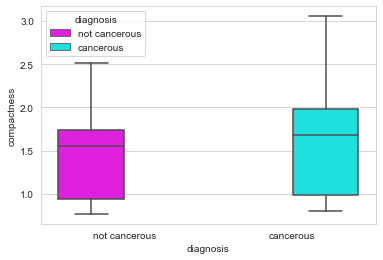

In [40]:
sns.boxplot(x = "diagnosis", y = "compactness", data = extended_frame, hue = "diagnosis", palette = ["magenta","cyan"])

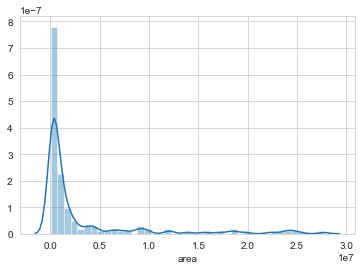

In [41]:
sns.distplot(extended_frame["area"])

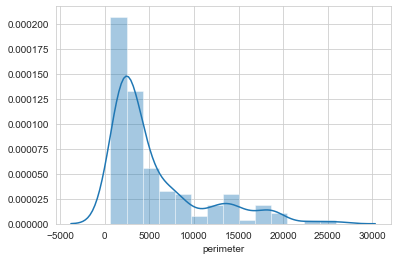

In [42]:
sns.distplot(extended_frame["perimeter"])

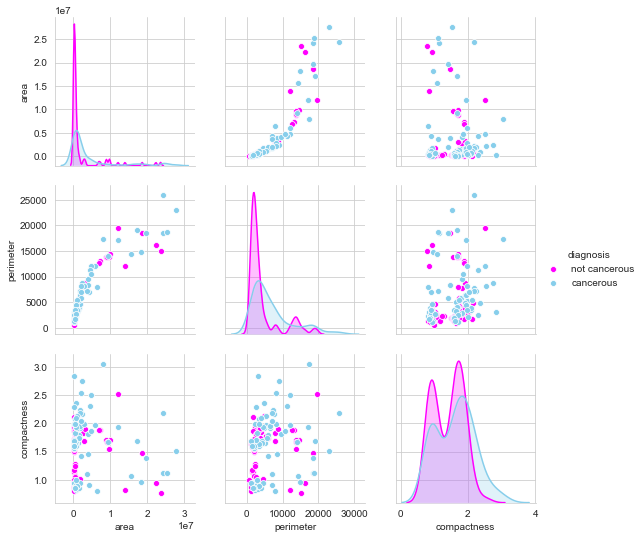

In [43]:
sns.pairplot(extended_frame.iloc[:,3:7], hue = "diagnosis", palette = ["magenta","skyblue"])

C:\Users\magnu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\magnu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


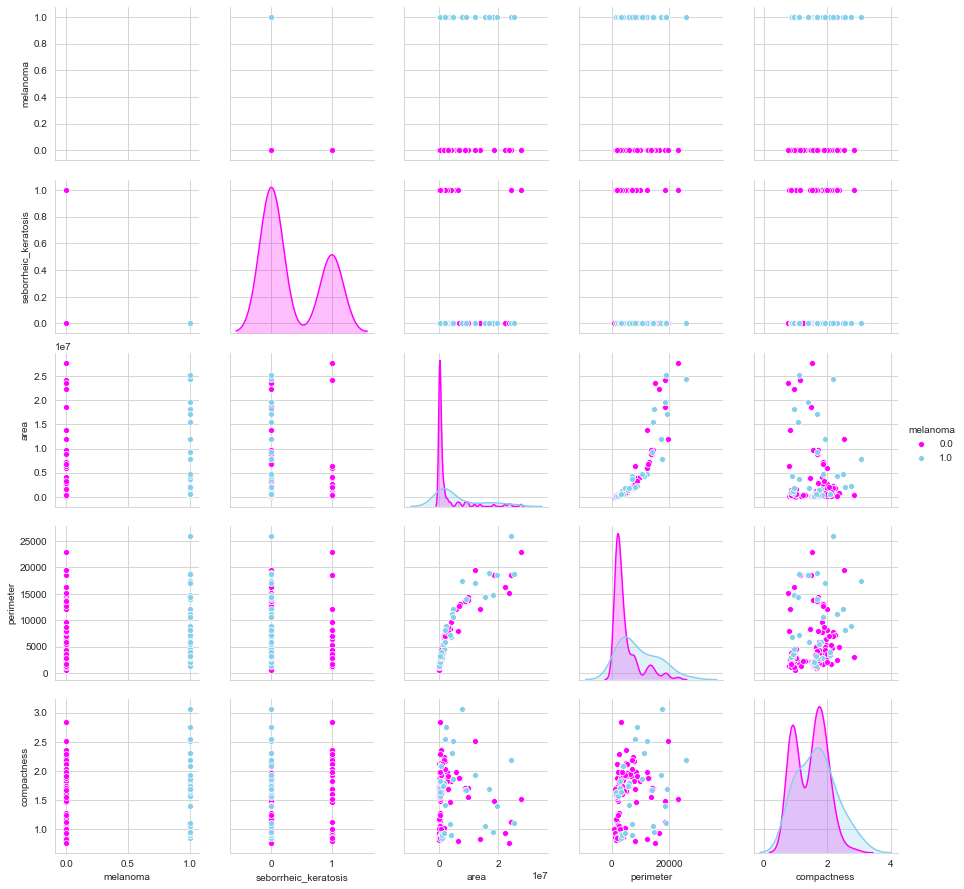

In [44]:
sns.pairplot(extended_frame.iloc[:,1:7], hue = "melanoma", palette = ["magenta","skyblue"])

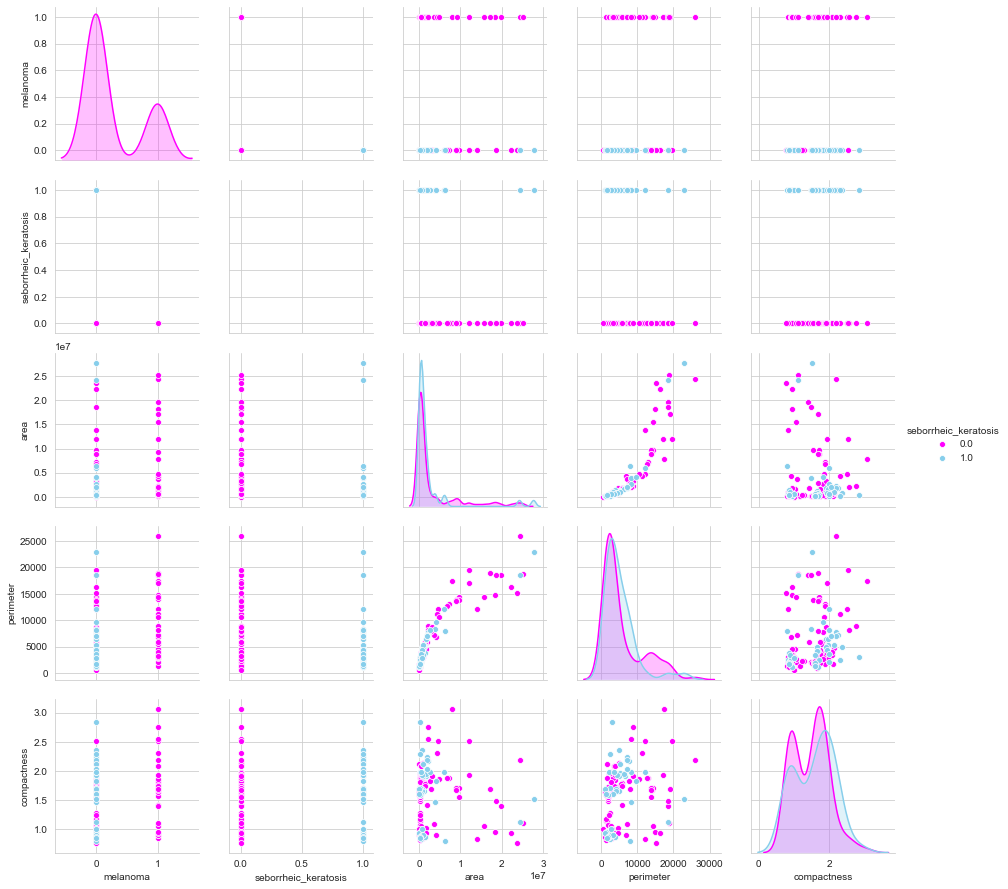

In [45]:
sns.pairplot(extended_frame.iloc[:,1:7], hue = "seborrheic_keratosis", palette = ["magenta","skyblue"])

In [46]:
extended_frame.std()

melanoma                4.013400e-01
seborrheic_keratosis    4.505031e-01
area                    5.897570e+06
perimeter               5.294597e+03
compactness             5.141190e-01
dtype: float64

In [47]:
extended_frame.describe()

melanoma  seborrheic_keratosis          area    perimeter  compactness
count  150.00000            150.000000  1.500000e+02    150.00000   150.000000
mean     0.20000              0.280000  3.114134e+06   5570.36000     1.510687
std      0.40134              0.450503  5.897570e+06   5294.59662     0.514119
min      0.00000              0.000000  3.294400e+04    642.00000     0.766830
25%      0.00000              0.000000  2.329922e+05   2014.50000     0.943462
50%      0.00000              0.000000  6.223165e+05   3324.50000     1.629844
75%      0.00000              1.000000  2.054852e+06   7137.50000     1.875265
max      1.00000              1.000000  2.770686e+07  25900.00000     3.055816

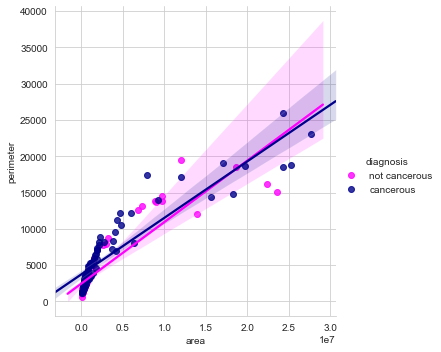

In [48]:
sns.lmplot(data=extended_frame, x = "area", y = "perimeter", hue = "diagnosis", height = 5, palette = ["magenta","darkblue"])

In [49]:
new_frame = pd.read_csv("../data/melanoma_healthy.csv")

In [50]:
new_frame.rename(columns = {"diagosis_sum": "diagnosis_sum"}, inplace=True)
new_frame

image_id  melanoma  seborrheic_keratosis        area  perimeter  \
0     ISIC_0000000       0.0                   0.0    364956.0     2258.0   
1     ISIC_0000001       0.0                   0.0     53432.0      914.0   
2     ISIC_0000002       1.0                   0.0    237402.0     2071.0   
3     ISIC_0000003       0.0                   0.0    260712.0     1848.0   
4     ISIC_0000004       1.0                   0.0    269484.0     1746.0   
...            ...       ...                   ...         ...        ...   
1741  ISIC_0015190       1.0                   0.0  12575987.0    18268.0   
1742  ISIC_0015200       1.0                   0.0  20680044.0    21573.0   
1743  ISIC_0015204       1.0                   0.0  13977416.0    17821.0   
1744  ISIC_0015219       1.0                   0.0   8019976.0    13546.0   
1745  ISIC_0015284       1.0                   0.0  11498412.0    12110.0   

      diagnosis_sum      diagnosis  compactness  
0               0.0  not cancerous     1.111725  
1               0.0  not cancerous     1.244174  
2               1.0      cancerous     1.437692  
3               0.0  not cancerous     1.042397  
4               1.0      cancerous     0.900214  
...             ...            ...          ...  
1741            1.0      cancerous     2.111690  
1742            1.0      cancerous     1.790852  
1743            1.0      cancerous     1.808121  
1744            1.0      cancerous     1.820703  
1745            1.0      cancerous     1.014940  

[1746 rows x 8 columns]

In [51]:
mask_mel = (new_frame["melanoma"] == 1.0)
mask_nonmel = (new_frame["melanoma"] == 0)

melanoma_frame = new_frame[mask_mel]
nonmelanoma_frame = new_frame[mask_nonmel]

In [52]:
melanoma_frame.rename(columns = {"diagosis_sum": "diagnosis_sum"}, inplace=True)

C:\Users\magnu\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [53]:
melanoma_frame

image_id  melanoma  seborrheic_keratosis        area  perimeter  \
2     ISIC_0000002       1.0                   0.0    237402.0     2071.0   
4     ISIC_0000004       1.0                   0.0    269484.0     1746.0   
12    ISIC_0000013       1.0                   0.0    192711.0     1635.0   
21    ISIC_0000022       1.0                   0.0    762155.0     3104.0   
25    ISIC_0000026       1.0                   0.0    904403.0     3259.0   
...            ...       ...                   ...         ...        ...   
1741  ISIC_0015190       1.0                   0.0  12575987.0    18268.0   
1742  ISIC_0015200       1.0                   0.0  20680044.0    21573.0   
1743  ISIC_0015204       1.0                   0.0  13977416.0    17821.0   
1744  ISIC_0015219       1.0                   0.0   8019976.0    13546.0   
1745  ISIC_0015284       1.0                   0.0  11498412.0    12110.0   

      diagnosis_sum  diagnosis  compactness  
2               1.0  cancerous     1.437692  
4               1.0  cancerous     0.900214  
12              1.0  cancerous     1.103873  
21              1.0  cancerous     1.005982  
25              1.0  cancerous     0.934538  
...             ...        ...          ...  
1741            1.0  cancerous     2.111690  
1742            1.0  cancerous     1.790852  
1743            1.0  cancerous     1.808121  
1744            1.0  cancerous     1.820703  
1745            1.0  cancerous     1.014940  

[374 rows x 8 columns]

In [54]:
nonmelanoma_frame

image_id  melanoma  seborrheic_keratosis       area  perimeter  \
0     ISIC_0000000       0.0                   0.0   364956.0     2258.0   
1     ISIC_0000001       0.0                   0.0    53432.0      914.0   
3     ISIC_0000003       0.0                   0.0   260712.0     1848.0   
5     ISIC_0000006       0.0                   0.0    69455.0     1090.0   
6     ISIC_0000007       0.0                   0.0    67562.0      938.0   
...            ...       ...                   ...        ...        ...   
1724  ISIC_0014925       0.0                   0.0  3175268.0     8096.0   
1725  ISIC_0014926       0.0                   0.0  5206636.0    10990.0   
1726  ISIC_0014929       0.0                   0.0  1624989.0     5707.0   
1727  ISIC_0014930       0.0                   0.0  4695487.0    10071.0   
1728  ISIC_0014933       0.0                   0.0  1892443.0     6252.0   

      diagnosis_sum      diagnosis  compactness  
0               0.0  not cancerous     1.111725  
1               0.0  not cancerous     1.244174  
3               0.0  not cancerous     1.042397  
5               0.0  not cancerous     1.361255  
6               0.0  not cancerous     1.036319  
...             ...            ...          ...  
1724            0.0  not cancerous     1.642672  
1725            0.0  not cancerous     1.845986  
1726            0.0  not cancerous     1.594981  
1727            0.0  not cancerous     1.718916  
1728            0.0  not cancerous     1.643635  

[1372 rows x 8 columns]

# Melanoma Data Visualizations

Text(0.5, 1.0, 'Area vs perimter of skin lesions')

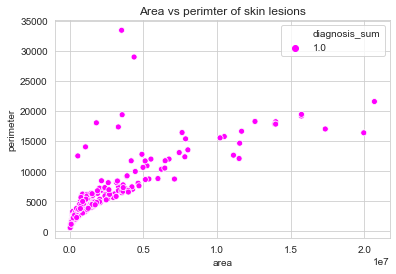

In [55]:
scatter = sns.scatterplot(data=melanoma_frame, x="area", y="perimeter", hue="diagnosis_sum", palette = ["magenta"])
scatter.set_title("Area vs perimter of skin lesions")

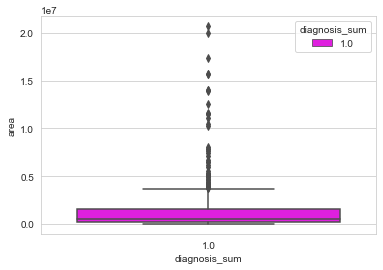

In [56]:
sns.boxplot(x = "diagnosis_sum", y = "area", data = melanoma_frame, hue = "diagnosis_sum", palette = ["magenta"]) 

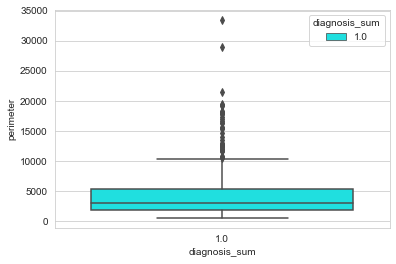

In [57]:
sns.boxplot(x = "diagnosis_sum", y = "perimeter", data = melanoma_frame, hue = "diagnosis_sum", palette = ["cyan"])

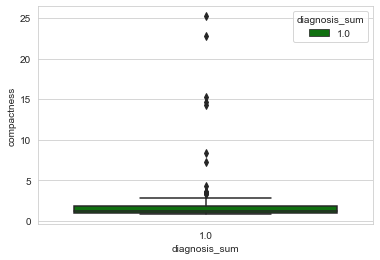

In [58]:
sns.boxplot(x = "diagnosis_sum", y = "compactness", data = melanoma_frame, hue = "diagnosis_sum", palette = ["green"])

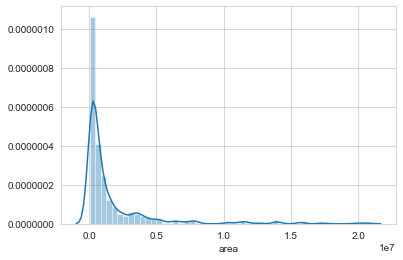

In [59]:
sns.distplot(melanoma_frame["area"])

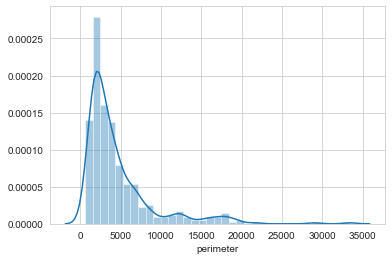

In [60]:
sns.distplot(melanoma_frame["perimeter"])

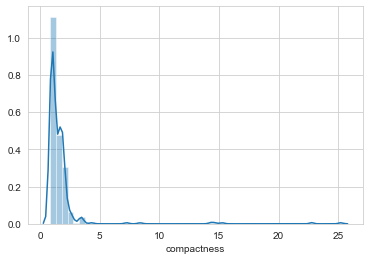

In [61]:
sns.distplot(melanoma_frame["compactness"])

C:\Users\magnu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\magnu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


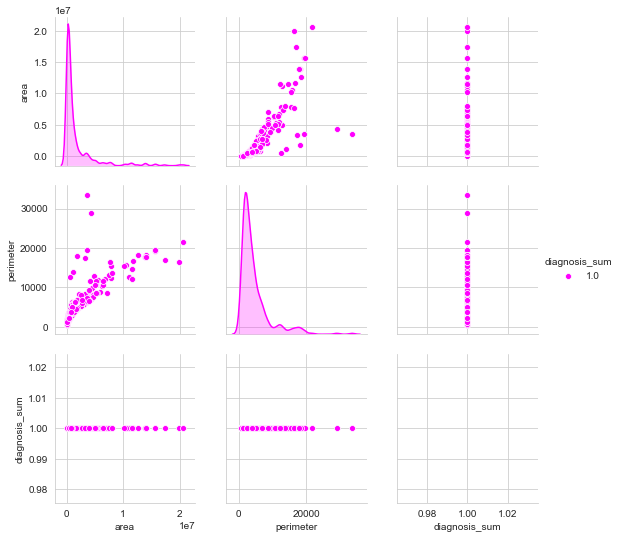

In [62]:
sns.pairplot(melanoma_frame.iloc[:,3:7], hue = "diagnosis_sum", palette = ["magenta"])

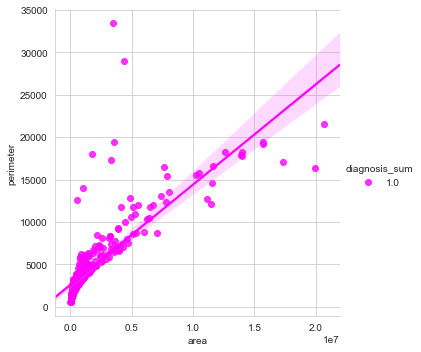

In [63]:
sns.lmplot(data=melanoma_frame, x="area", y="perimeter", hue="diagnosis_sum", height=5, palette = ["magenta"])

# Non-melanoma Data Visualization

Text(0.5, 1.0, 'Area vs perimter of skin lesions')

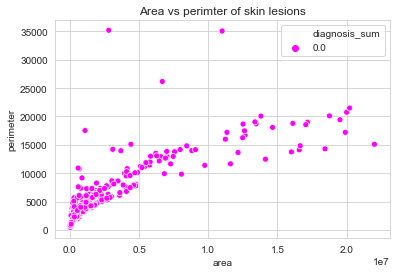

In [64]:
scatter = sns.scatterplot(data=nonmelanoma_frame, x="area", y="perimeter", hue="diagnosis_sum", palette = ["magenta"])
scatter.set_title("Area vs perimter of skin lesions")

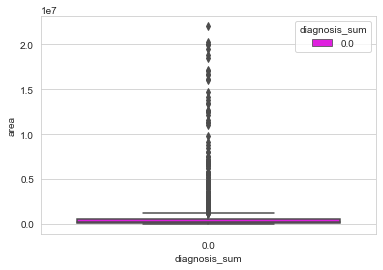

In [65]:
sns.boxplot(x = "diagnosis_sum", y = "area", data = nonmelanoma_frame, hue = "diagnosis_sum", palette = ["magenta"]) 

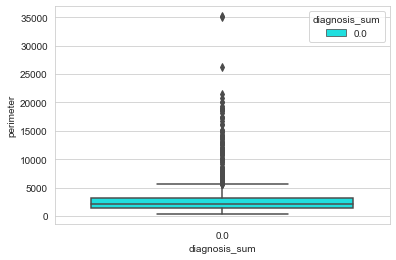

In [66]:
sns.boxplot(x = "diagnosis_sum", y = "perimeter", data = nonmelanoma_frame, hue = "diagnosis_sum", palette = ["cyan"])

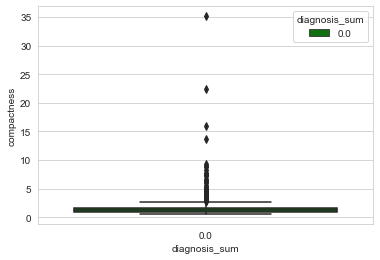

In [67]:
sns.boxplot(x = "diagnosis_sum", y = "compactness", data = nonmelanoma_frame, hue = "diagnosis_sum", palette = ["green"])

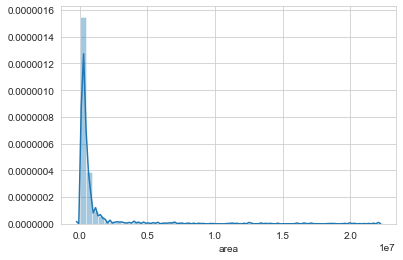

In [68]:
sns.distplot(nonmelanoma_frame["area"])

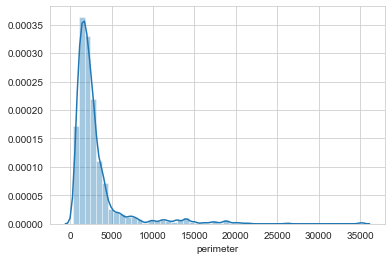

In [69]:
sns.distplot(nonmelanoma_frame["perimeter"])

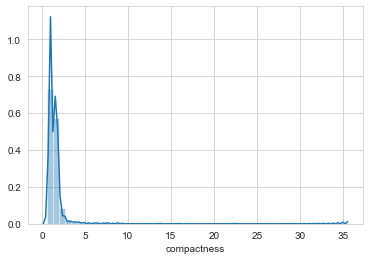

In [70]:
sns.distplot(nonmelanoma_frame["compactness"])

C:\Users\magnu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\magnu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


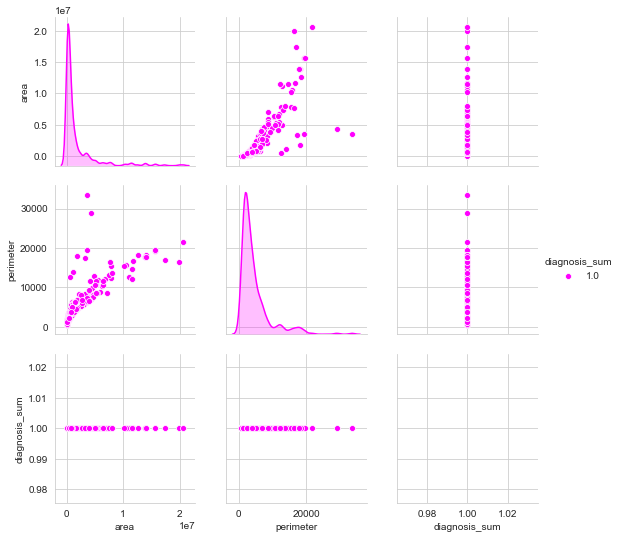

In [71]:
sns.pairplot(melanoma_frame.iloc[:,3:7], hue = "diagnosis_sum", palette = ["magenta"])

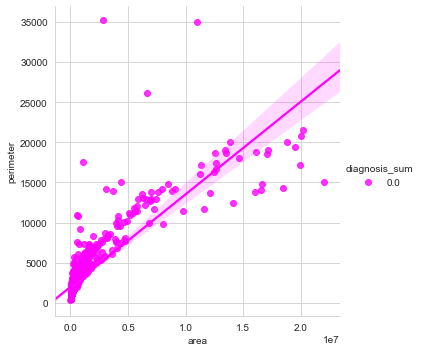

In [73]:
sns.lmplot(data=nonmelanoma_frame, x="area", y="perimeter", hue="diagnosis_sum", height=5, palette = ["magenta"])

# Classifiers Applied to the Data

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [75]:
new_frame

image_id  melanoma  seborrheic_keratosis        area  perimeter  \
0     ISIC_0000000       0.0                   0.0    364956.0     2258.0   
1     ISIC_0000001       0.0                   0.0     53432.0      914.0   
2     ISIC_0000002       1.0                   0.0    237402.0     2071.0   
3     ISIC_0000003       0.0                   0.0    260712.0     1848.0   
4     ISIC_0000004       1.0                   0.0    269484.0     1746.0   
...            ...       ...                   ...         ...        ...   
1741  ISIC_0015190       1.0                   0.0  12575987.0    18268.0   
1742  ISIC_0015200       1.0                   0.0  20680044.0    21573.0   
1743  ISIC_0015204       1.0                   0.0  13977416.0    17821.0   
1744  ISIC_0015219       1.0                   0.0   8019976.0    13546.0   
1745  ISIC_0015284       1.0                   0.0  11498412.0    12110.0   

      diagnosis_sum      diagnosis  compactness  
0               0.0  not cancerous     1.111725  
1               0.0  not cancerous     1.244174  
2               1.0      cancerous     1.437692  
3               0.0  not cancerous     1.042397  
4               1.0      cancerous     0.900214  
...             ...            ...          ...  
1741            1.0      cancerous     2.111690  
1742            1.0      cancerous     1.790852  
1743            1.0      cancerous     1.808121  
1744            1.0      cancerous     1.820703  
1745            1.0      cancerous     1.014940  

[1746 rows x 8 columns]

In [76]:
X = new_frame[["area","perimeter","compactness"]]
y = new_frame["diagnosis_sum"]
class_scores = {}

In [77]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, stratify=y_dev)

In [78]:
X_train

area  perimeter  compactness
758    162543.0     1383.0     0.936410
73      98461.0     1510.0     1.842807
1599  7279456.0    11643.0     1.481907
683    439226.0     2324.0     0.978530
980    297246.0     2423.0     1.571741
...         ...        ...          ...
755    270794.0     1742.0     0.891759
802    141185.0     1235.0     0.859677
786    266680.0     1673.0     0.835202
1387   166356.0     1929.0     1.779984
135   1627467.0     4202.0     0.863356

[1047 rows x 3 columns]

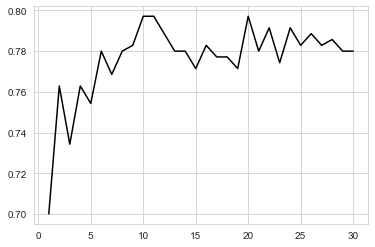

In [79]:
scores_list = []
k_range = range(1,31)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores_list.append(accuracy_score(y_test, y_pred))
plt.plot(k_range, scores_list, 'k');

In [80]:
k = 10
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
score = accuracy_score(y_test, y_pred)

In [81]:
class_scores["KNeighborsClassifier"] = score
score

0.7971428571428572

In [82]:
DTC = DecisionTreeClassifier(random_state = 24)
DTC.fit(X_train, y_train)
y_predict = DTC.predict(X_test)
score = accuracy_score(y_test,y_predict)

In [83]:
class_scores["DecisionTreeClassifier"] = score
score

0.6857142857142857

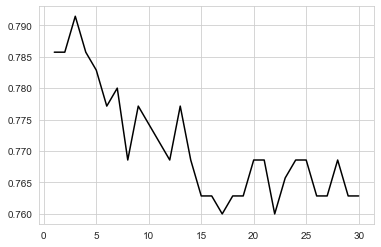

In [84]:
scores_list = []
k_range = range(1,31)
for k in k_range:
    RFC = RandomForestClassifier(n_estimators=100, max_depth=k, random_state=24)
    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)
    scores_list.append(accuracy_score(y_test, y_pred))
plt.plot(k_range, scores_list, 'k');

In [85]:
RFC = RandomForestClassifier(max_depth=1, random_state=24)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
score = accuracy_score(y_test, y_pred)

C:\Users\magnu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [86]:
class_scores["RandomForestClassifier"] = score
score

0.7857142857142857

In [87]:
SV = SVC()
SV.fit(X_train, y_train)
y_pred = SV.predict(X_test)
score = accuracy_score(y_test, y_pred)

C:\Users\magnu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [88]:
class_scores["SupportVector"] = score
score

0.7857142857142857

In [89]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
score = accuracy_score(y_test, y_pred)

C:\Users\magnu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [90]:
class_scores["LogisticRegression"] = score
score

0.7771428571428571

In [91]:
class_scores

{'KNeighborsClassifier': 0.7971428571428572,
 'DecisionTreeClassifier': 0.6857142857142857,
 'RandomForestClassifier': 0.7857142857142857,
 'SupportVector': 0.7857142857142857,
 'LogisticRegression': 0.7771428571428571}

In [92]:
final_frame = pd.read_csv("../data/processed/final_balanced.csv")

In [93]:
final_frame

image_id  melanoma  seborrheic_keratosis   radius_sd  radius_mean  \
0    ISIC_0000002       1.0                   0.0  110.927367   304.913068   
1    ISIC_0000004       1.0                   0.0   79.699652   305.763837   
2    ISIC_0000013       1.0                   0.0  109.606470   275.459923   
3    ISIC_0000022       1.0                   0.0  247.169072   578.083811   
4    ISIC_0000026       1.0                   0.0  218.529228   577.885525   
..            ...       ...                   ...         ...          ...   
743  ISIC_0002871       0.0                   0.0  273.160339  1228.426820   
744  ISIC_0002879       0.0                   0.0  223.416395   470.280999   
745  ISIC_0002885       0.0                   0.0  236.300238   602.975291   
746  ISIC_0002948       0.0                   0.0  227.172389   707.792326   
747  ISIC_0002975       0.0                   0.0  106.419952   412.193524   

         area  perimeter  radius_norm  compactness  diagnosis_sum  ...  \
0    237402.0     2071.0     0.363800     1.437692            1.0  ...   
1    269484.0     1746.0     0.260658     0.900214            1.0  ...   
2    192711.0     1635.0     0.397904     1.103873            1.0  ...   
3    762155.0     3104.0     0.427566     1.005982            1.0  ...   
4    904403.0     3259.0     0.378153     0.934538            1.0  ...   
..        ...        ...          ...          ...            ...  ...   
743  487836.0     2359.0     0.222366     0.907762            0.0  ...   
744  473866.0     2310.0     0.475070     0.896104            0.0  ...   
745  913398.0     3214.0     0.391890     0.899957            0.0  ...   
746  341419.0     2676.0     0.320959     1.669070            0.0  ...   
747  486661.0     3002.0     0.258180     1.473618            0.0  ...   

    norm_average_r  norm_average_g  norm_average_b  norm_r_std  norm_g_std  \
0         0.373684        0.448718        0.544304    0.306510    0.470411   
1         0.663158        0.538462        0.759494    0.564673    0.540691   
2         0.357895        0.326923        0.284810    0.676611    0.578115   
3         0.463158        0.455128        0.417722    0.308581    0.512895   
4         0.542105        0.551282        0.613924    0.110772    0.239382   
..             ...             ...             ...         ...         ...   
743       0.568421        0.506410        0.430380    0.432913    0.539049   
744       0.757895        0.583333        0.417722    0.537049    0.743669   
745       0.600000        0.493590        0.398734    0.397018    0.529479   
746       0.921053        0.897436        0.753165    0.105411    0.253030   
747       0.657895        0.564103        0.398734    0.122792    0.272686   

     norm_b_std  average_std  norm_r_range  norm_g_range  norm_b_range  
0      0.564853     0.447258      0.391892      0.470874      0.657407  
1      0.523281     0.542882      0.905405      0.893204      0.907407  
2      0.432297     0.562341      0.702703      0.543689      0.546296  
3      0.566412     0.462629      0.369369      0.548544      0.597222  
4      0.293557     0.214570      0.238739      0.296117      0.361111  
..          ...          ...           ...           ...           ...  
743    0.517401     0.496454      0.675676      0.708738      0.722222  
744    0.660905     0.647208      0.585586      0.898058      0.916667  
745    0.472607     0.466368      0.603604      0.718447      0.671296  
746    0.336312     0.231584      0.144144      0.359223      0.296296  
747    0.343281     0.246253      0.184685      0.330097      0.305556  

[748 rows x 25 columns]

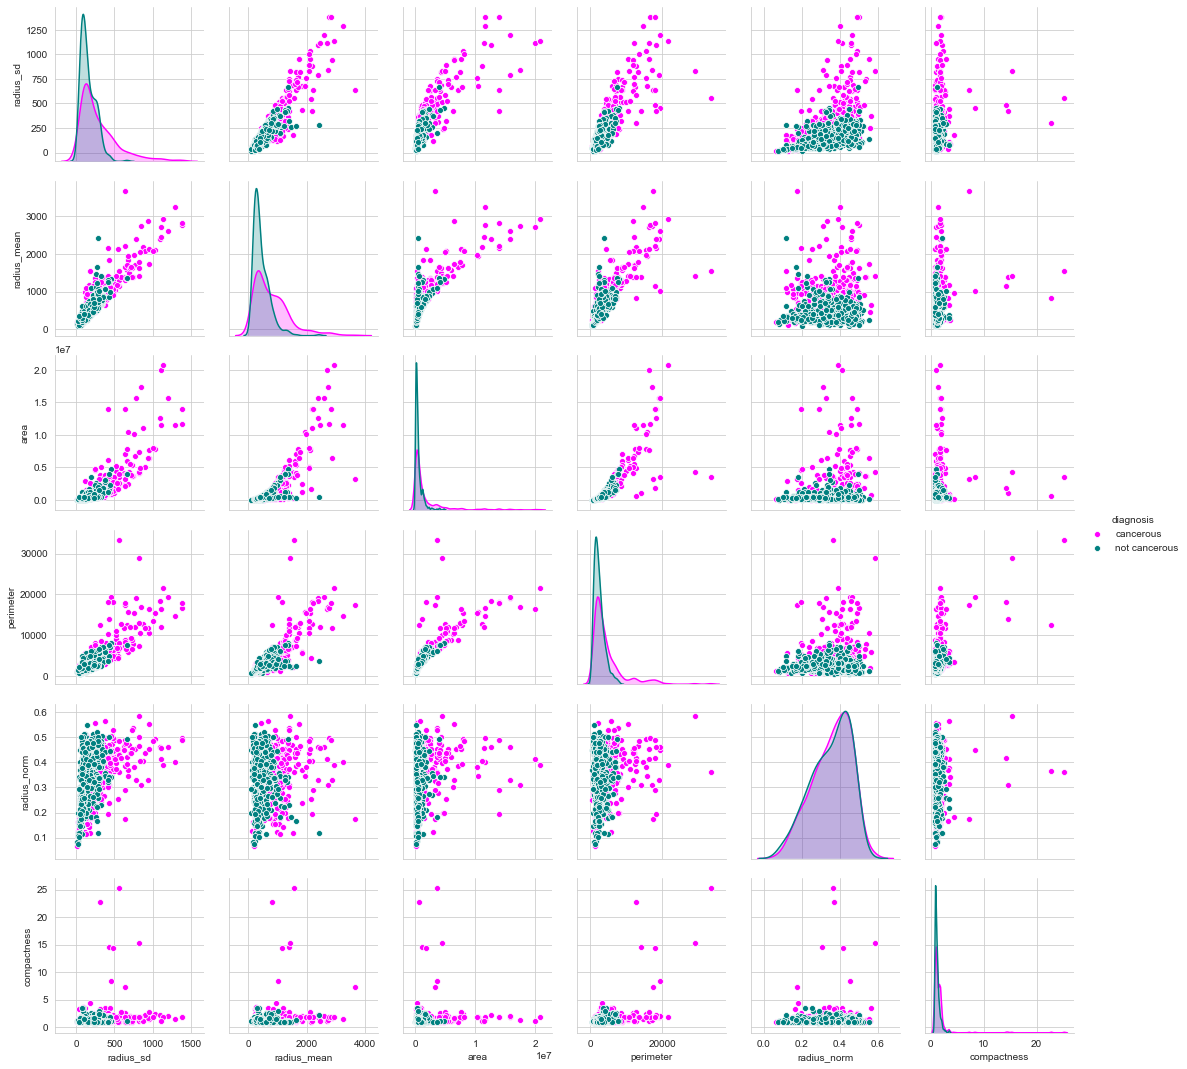

In [94]:
shape_frame = pd.DataFrame(final_frame.iloc[:,3:9])
shape_frame["diagnosis"] = final_frame["diagnosis"]
sns.pairplot(shape_frame.iloc[:], hue = "diagnosis", palette = ["magenta","teal"])

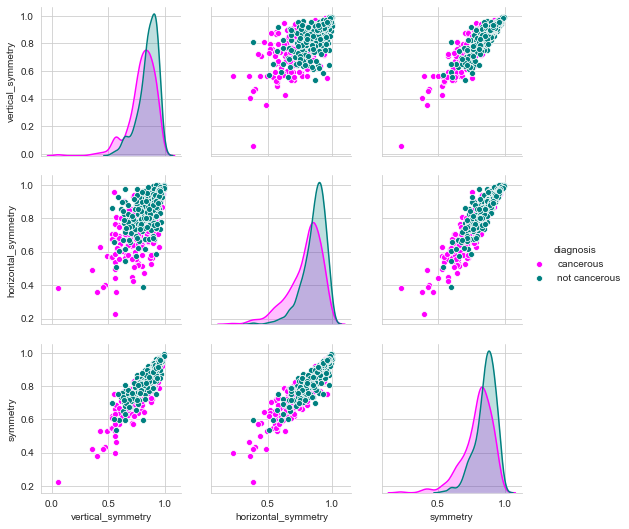

In [95]:
symmetry_frame = pd.DataFrame(final_frame.iloc[:,10:14])
sns.pairplot(symmetry_frame, hue = "diagnosis", palette = ["magenta","teal"])

In [96]:
diag = pd.DataFrame(final_frame["diagnosis"])
diag

diagnosis
0        cancerous
1        cancerous
2        cancerous
3        cancerous
4        cancerous
..             ...
743  not cancerous
744  not cancerous
745  not cancerous
746  not cancerous
747  not cancerous

[748 rows x 1 columns]

In [97]:
color_frame = pd.DataFrame(final_frame.iloc[:,15:])
color_frame

norm_average_r  norm_average_g  norm_average_b  norm_r_std  norm_g_std  \
0          0.373684        0.448718        0.544304    0.306510    0.470411   
1          0.663158        0.538462        0.759494    0.564673    0.540691   
2          0.357895        0.326923        0.284810    0.676611    0.578115   
3          0.463158        0.455128        0.417722    0.308581    0.512895   
4          0.542105        0.551282        0.613924    0.110772    0.239382   
..              ...             ...             ...         ...         ...   
743        0.568421        0.506410        0.430380    0.432913    0.539049   
744        0.757895        0.583333        0.417722    0.537049    0.743669   
745        0.600000        0.493590        0.398734    0.397018    0.529479   
746        0.921053        0.897436        0.753165    0.105411    0.253030   
747        0.657895        0.564103        0.398734    0.122792    0.272686   

     norm_b_std  average_std  norm_r_range  norm_g_range  norm_b_range  
0      0.564853     0.447258      0.391892      0.470874      0.657407  
1      0.523281     0.542882      0.905405      0.893204      0.907407  
2      0.432297     0.562341      0.702703      0.543689      0.546296  
3      0.566412     0.462629      0.369369      0.548544      0.597222  
4      0.293557     0.214570      0.238739      0.296117      0.361111  
..          ...          ...           ...           ...           ...  
743    0.517401     0.496454      0.675676      0.708738      0.722222  
744    0.660905     0.647208      0.585586      0.898058      0.916667  
745    0.472607     0.466368      0.603604      0.718447      0.671296  
746    0.336312     0.231584      0.144144      0.359223      0.296296  
747    0.343281     0.246253      0.184685      0.330097      0.305556  

[748 rows x 10 columns]

In [98]:
color_frame["diagnosis"] = diag

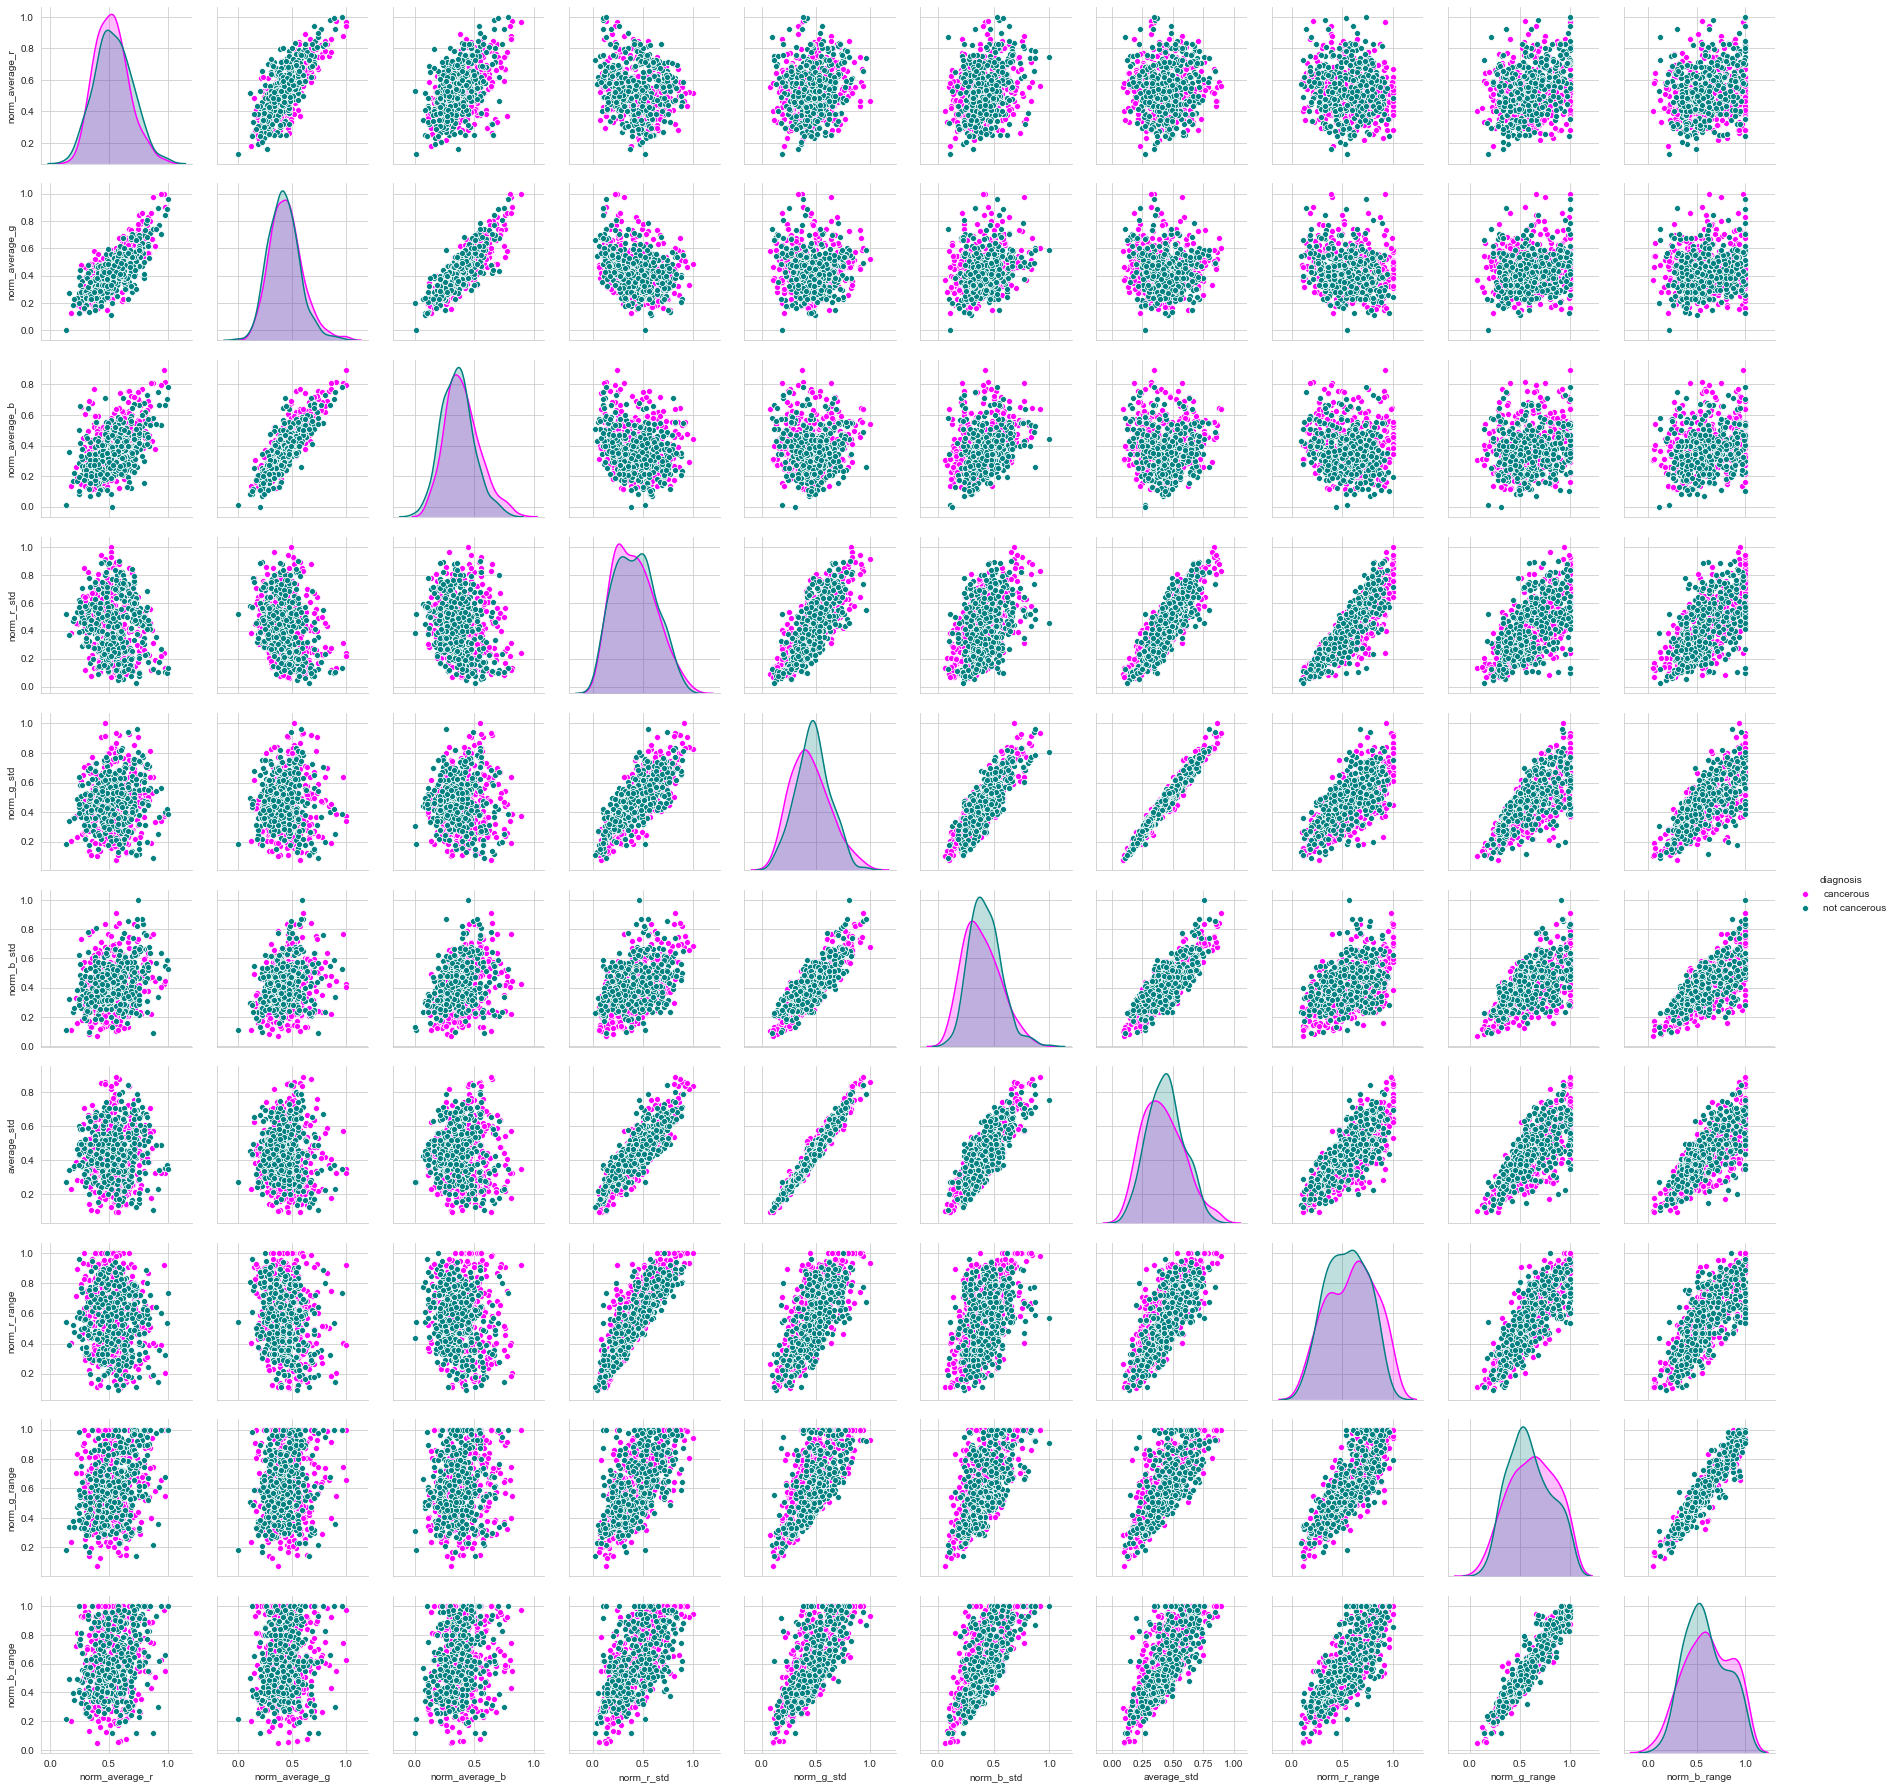

In [99]:
sns.pairplot(color_frame.iloc[:], hue = "diagnosis", palette = ["magenta","teal"])

In [100]:
shape_frame["diagnosis_sum"] = final_frame["diagnosis_sum"]
shape_frame

radius_sd  radius_mean      area  perimeter  radius_norm  compactness  \
0    110.927367   304.913068  237402.0     2071.0     0.363800     1.437692   
1     79.699652   305.763837  269484.0     1746.0     0.260658     0.900214   
2    109.606470   275.459923  192711.0     1635.0     0.397904     1.103873   
3    247.169072   578.083811  762155.0     3104.0     0.427566     1.005982   
4    218.529228   577.885525  904403.0     3259.0     0.378153     0.934538   
..          ...          ...       ...        ...          ...          ...   
743  273.160339  1228.426820  487836.0     2359.0     0.222366     0.907762   
744  223.416395   470.280999  473866.0     2310.0     0.475070     0.896104   
745  236.300238   602.975291  913398.0     3214.0     0.391890     0.899957   
746  227.172389   707.792326  341419.0     2676.0     0.320959     1.669070   
747  106.419952   412.193524  486661.0     3002.0     0.258180     1.473618   

         diagnosis  diagnosis_sum  
0        cancerous            1.0  
1        cancerous            1.0  
2        cancerous            1.0  
3        cancerous            1.0  
4        cancerous            1.0  
..             ...            ...  
743  not cancerous            0.0  
744  not cancerous            0.0  
745  not cancerous            0.0  
746  not cancerous            0.0  
747  not cancerous            0.0  

[748 rows x 8 columns]

In [101]:
X = shape_frame[["radius_sd","radius_mean","area","perimeter","radius_norm","compactness"]]
y = shape_frame["diagnosis_sum"]
shape_class_scores = {}

In [102]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, stratify=y_dev)

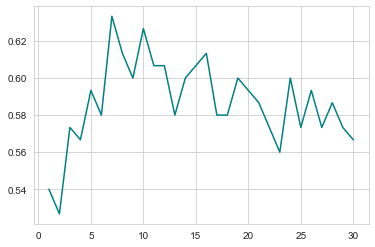

In [103]:
scores_list = []
k_range = range(1,31)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores_list.append(accuracy_score(y_test, y_pred))
plt.plot(k_range, scores_list, 'teal');

In [104]:
k = 10
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
score = accuracy_score(y_test, y_pred)

In [105]:
shape_class_scores["KNeighborsClassifier"] = score
score

0.6266666666666667

In [106]:
DTC = DecisionTreeClassifier(random_state = 24)
DTC.fit(X_train, y_train)
y_predict = DTC.predict(X_test)
score = accuracy_score(y_test,y_predict)

In [107]:
shape_class_scores["DecisionTreeClassifier"] = score
score

0.6666666666666666

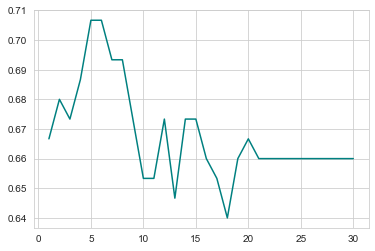

In [108]:
scores_list = []
k_range = range(1,31)
for k in k_range:
    RFC = RandomForestClassifier(n_estimators=100, max_depth=k, random_state=24)
    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)
    scores_list.append(accuracy_score(y_test, y_pred))
plt.plot(k_range, scores_list, 'teal');

In [109]:
RFC = RandomForestClassifier(max_depth=1, random_state=24)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

C:\Users\magnu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6733333333333333

In [110]:
shape_class_scores["RandomForestClassifier"] = score

In [111]:
SV = SVC()
SV.fit(X_train, y_train)
y_pred = SV.predict(X_test)
score = accuracy_score(y_test, y_pred)

C:\Users\magnu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [112]:
shape_class_scores["SupportVector"] = score
score

0.5

In [113]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
score = accuracy_score(y_test, y_pred)

C:\Users\magnu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [114]:
shape_class_scores["LogisticRegression"] = score
score

0.64

In [115]:
shape_class_scores

{'KNeighborsClassifier': 0.6266666666666667,
 'DecisionTreeClassifier': 0.6666666666666666,
 'RandomForestClassifier': 0.6733333333333333,
 'SupportVector': 0.5,
 'LogisticRegression': 0.64}

In [116]:
symmetry_frame["diagnosis_sum"] = final_frame["diagnosis_sum"]
symmetry_frame

diagnosis  vertical_symmetry  horizontal_symmetry  symmetry  \
0        cancerous           0.897238             0.932438  0.914838   
1        cancerous           0.922531             0.861041  0.891786   
2        cancerous           0.781710             0.803446  0.792578   
3        cancerous           0.808185             0.908681  0.858433   
4        cancerous           0.771959             0.777100  0.774530   
..             ...                ...                  ...       ...   
743  not cancerous           0.854099             0.853476  0.853788   
744  not cancerous           0.641887             0.787706  0.714796   
745  not cancerous           0.934196             0.892636  0.913416   
746  not cancerous           0.832369             0.803206  0.817787   
747  not cancerous           0.956789             0.960889  0.958839   

     diagnosis_sum  
0              1.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0  
..             ...  
743            0.0  
744            0.0  
745            0.0  
746            0.0  
747            0.0  

[748 rows x 5 columns]

In [117]:
X = symmetry_frame[["vertical_symmetry","horizontal_symmetry","symmetry"]]
y = symmetry_frame["diagnosis_sum"]
symmetry_class_scores = {}

In [118]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, stratify=y_dev)

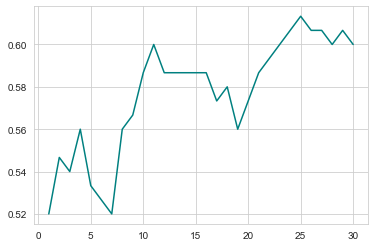

In [119]:
scores_list = []
k_range = range(1,31)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores_list.append(accuracy_score(y_test, y_pred))
plt.plot(k_range, scores_list, 'teal');

In [120]:
k = 10
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
score = accuracy_score(y_test, y_pred)

In [121]:
symmetry_class_scores["KNeighborsClassifier"] = score
score

0.5866666666666667

In [122]:
DTC = DecisionTreeClassifier(random_state = 24)
DTC.fit(X_train, y_train)
y_predict = DTC.predict(X_test)
score = accuracy_score(y_test,y_predict)

In [123]:
symmetry_class_scores["DecisionTreeClassifier"] = score
score

0.58

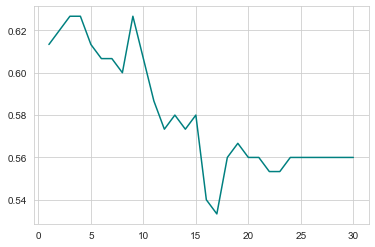

In [124]:
scores_list = []
k_range = range(1,31)
for k in k_range:
    RFC = RandomForestClassifier(n_estimators=100, max_depth=k, random_state=24)
    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)
    scores_list.append(accuracy_score(y_test, y_pred))
plt.plot(k_range, scores_list, 'teal');

In [125]:
RFC = RandomForestClassifier(max_depth=1, random_state=24)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

C:\Users\magnu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.62

In [126]:
symmetry_class_scores["RandomForestClassifier"] = score

In [127]:
SV = SVC()
SV.fit(X_train, y_train)
y_pred = SV.predict(X_test)
score = accuracy_score(y_test, y_pred)

C:\Users\magnu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [128]:
symmetry_class_scores["SupportVector"] = score
score

0.58

In [129]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
score = accuracy_score(y_test, y_pred)

C:\Users\magnu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [130]:
symmetry_class_scores["LogisticRegression"] = score
score

0.58

In [131]:
symmetry_class_scores

{'KNeighborsClassifier': 0.5866666666666667,
 'DecisionTreeClassifier': 0.58,
 'RandomForestClassifier': 0.62,
 'SupportVector': 0.58,
 'LogisticRegression': 0.58}

In [132]:
color_frame["diagnosis_sum"] = final_frame["diagnosis_sum"]
color_frame

norm_average_r  norm_average_g  norm_average_b  norm_r_std  norm_g_std  \
0          0.373684        0.448718        0.544304    0.306510    0.470411   
1          0.663158        0.538462        0.759494    0.564673    0.540691   
2          0.357895        0.326923        0.284810    0.676611    0.578115   
3          0.463158        0.455128        0.417722    0.308581    0.512895   
4          0.542105        0.551282        0.613924    0.110772    0.239382   
..              ...             ...             ...         ...         ...   
743        0.568421        0.506410        0.430380    0.432913    0.539049   
744        0.757895        0.583333        0.417722    0.537049    0.743669   
745        0.600000        0.493590        0.398734    0.397018    0.529479   
746        0.921053        0.897436        0.753165    0.105411    0.253030   
747        0.657895        0.564103        0.398734    0.122792    0.272686   

     norm_b_std  average_std  norm_r_range  norm_g_range  norm_b_range  \
0      0.564853     0.447258      0.391892      0.470874      0.657407   
1      0.523281     0.542882      0.905405      0.893204      0.907407   
2      0.432297     0.562341      0.702703      0.543689      0.546296   
3      0.566412     0.462629      0.369369      0.548544      0.597222   
4      0.293557     0.214570      0.238739      0.296117      0.361111   
..          ...          ...           ...           ...           ...   
743    0.517401     0.496454      0.675676      0.708738      0.722222   
744    0.660905     0.647208      0.585586      0.898058      0.916667   
745    0.472607     0.466368      0.603604      0.718447      0.671296   
746    0.336312     0.231584      0.144144      0.359223      0.296296   
747    0.343281     0.246253      0.184685      0.330097      0.305556   

         diagnosis  diagnosis_sum  
0        cancerous            1.0  
1        cancerous            1.0  
2        cancerous            1.0  
3        cancerous            1.0  
4        cancerous            1.0  
..             ...            ...  
743  not cancerous            0.0  
744  not cancerous            0.0  
745  not cancerous            0.0  
746  not cancerous            0.0  
747  not cancerous            0.0  

[748 rows x 12 columns]

In [133]:
X = color_frame[["norm_average_g","norm_average_b","norm_r_std","norm_g_std","norm_b_std","average_std","norm_r_range","norm_g_range","norm_b_range"]]
y = color_frame["diagnosis_sum"]
color_class_scores = {}

In [134]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, stratify=y_dev)

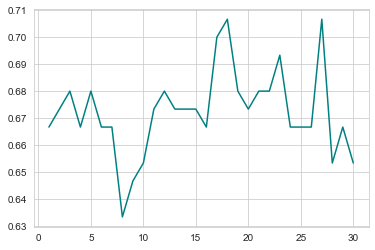

In [135]:
scores_list = []
k_range = range(1,31)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores_list.append(accuracy_score(y_test, y_pred))
plt.plot(k_range, scores_list, 'teal');

In [136]:
k = 10
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
score = accuracy_score(y_test, y_pred)

In [137]:
color_class_scores["KNeighborsClassifier"] = score
score

0.6533333333333333

In [138]:
DTC = DecisionTreeClassifier(random_state = 24)
DTC.fit(X_train, y_train)
y_predict = DTC.predict(X_test)
score = accuracy_score(y_test,y_predict)

In [139]:
color_class_scores["DecisionTreeClassifier"] = score
score

0.6666666666666666

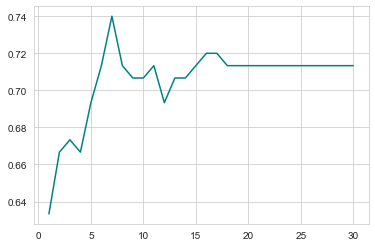

In [140]:
scores_list = []
k_range = range(1,31)
for k in k_range:
    RFC = RandomForestClassifier(n_estimators=100, max_depth=k, random_state=24)
    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)
    scores_list.append(accuracy_score(y_test, y_pred))
plt.plot(k_range, scores_list, 'teal');

In [141]:
RFC = RandomForestClassifier(max_depth=1, random_state=24)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

C:\Users\magnu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6533333333333333

In [142]:
color_class_scores["RandomForestClassifier"] = score

In [143]:
SV = SVC()
SV.fit(X_train, y_train)
y_pred = SV.predict(X_test)
score = accuracy_score(y_test, y_pred)

C:\Users\magnu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [144]:
color_class_scores["SupportVector"] = score
score

0.5733333333333334

In [145]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
score = accuracy_score(y_test, y_pred)

C:\Users\magnu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [146]:
color_class_scores["LogisticRegression"] = score
score

0.6466666666666666

In [147]:
color_class_scores

{'KNeighborsClassifier': 0.6533333333333333,
 'DecisionTreeClassifier': 0.6666666666666666,
 'RandomForestClassifier': 0.6533333333333333,
 'SupportVector': 0.5733333333333334,
 'LogisticRegression': 0.6466666666666666}

Text(0.5, 1.0, 'Classifier Scores for Shape Features')

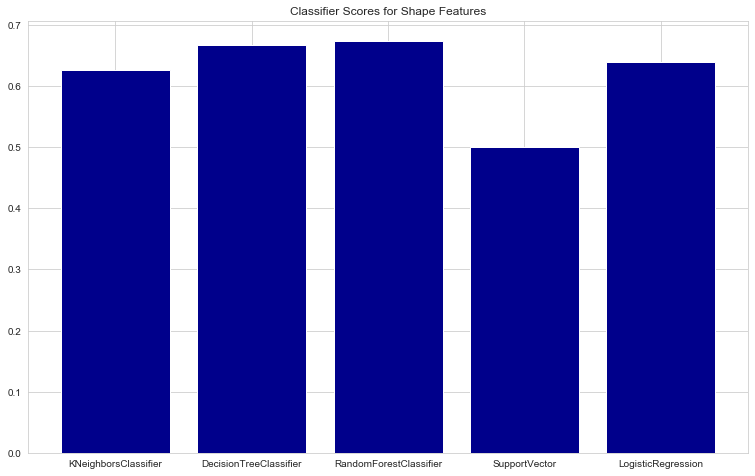

In [148]:
fig = plt.figure(figsize = (10,6))
axes = fig.add_axes([0,0,1,1])

X_l, Y_l = [], []
for score in shape_class_scores:
    X_l.append(score); Y_l.append(shape_class_scores[score])

axes.bar(X_l , Y_l, color = "darkblue")
axes.set_title("Classifier Scores for Shape Features")

Text(0.5, 1.0, 'Classifier Scores for Symmetry Features')

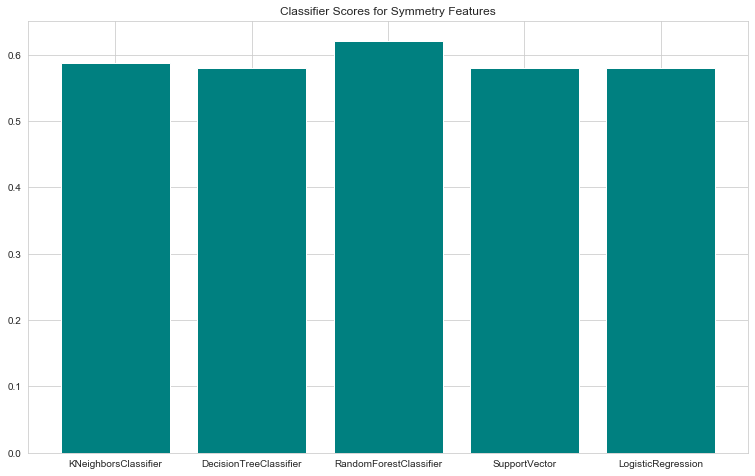

In [149]:
fig = plt.figure(figsize = (10,6))
axes = fig.add_axes([0,0,1,1])

X_l, Y_l = [], []
for score in symmetry_class_scores:
    X_l.append(score); Y_l.append(symmetry_class_scores[score])

axes.bar(X_l , Y_l, color = "teal")
axes.set_title("Classifier Scores for Symmetry Features")

Text(0.5, 1.0, 'Classifier Scores for Color Features')

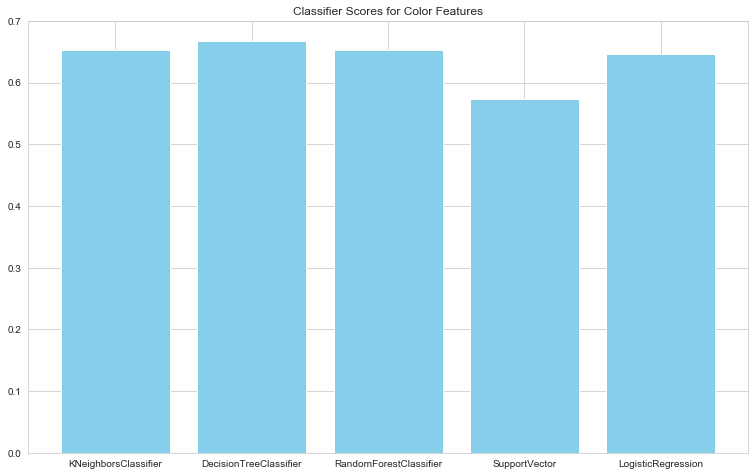

In [150]:
fig = plt.figure(figsize = (10,6))
axes = fig.add_axes([0,0,1,1])

X_l, Y_l = [], []
for score in color_class_scores:
    X_l.append(score); Y_l.append(color_class_scores[score])

axes.bar(X_l , Y_l, color = "skyblue")
axes.set_title("Classifier Scores for Color Features")